In [8]:
import json
import pandas as pd
from utils.utils import process_single_market

# Loading data into a df

In [9]:
with open('ladders.json', 'r') as file:
    ladders = json.load(file)

In [10]:
def get_prices_and_ltp(runner_data):
    best_back = runner_data.get('atb', [])[0][0] if runner_data.get('atb') else None
    best_lay = runner_data.get('atl', [])[0][0] if runner_data.get('atl') else None
    ltp = runner_data.get('ltp', None)
    return best_back, best_lay, ltp

extracted_data = []
current_inPlay = None

for update in ladders:
    pt = update['pt']
    runner_keys = list(update['runners'].keys())
    if 'marketDefinition' in update:
        current_inPlay = update['marketDefinition'].get('inPlay', None)
    
    runner1_best_back, runner1_best_lay, runner1_ltp = get_prices_and_ltp(update['runners'][runner_keys[0]])
    runner2_best_back, runner2_best_lay, runner2_ltp = get_prices_and_ltp(update['runners'][runner_keys[1]])
    runner3_best_back, runner3_best_lay, runner3_ltp = get_prices_and_ltp(update['runners'][runner_keys[2]])
    
    extracted_data.append({
        'pt': pt,
        'runner1_best_back': runner1_best_back,
        'runner1_best_lay': runner1_best_lay,
        'runner1_ltp': runner1_ltp,
        'runner2_best_back': runner2_best_back,
        'runner2_best_lay': runner2_best_lay,
        'runner2_ltp': runner2_ltp,
        'runner3_best_back': runner3_best_back,
        'runner3_best_lay': runner3_best_lay,
        'runner3_ltp': runner3_ltp,
        'inPlay': current_inPlay
    })

# Create a DataFrame from the extracted data
df = pd.DataFrame(extracted_data)


In [11]:
df[30000:30010]

,pt,runner1_best_back,runner1_best_lay,runner1_ltp,runner2_best_back,runner2_best_lay,runner2_ltp,runner3_best_back,runner3_best_lay,runner3_ltp,inPlay
30000,2023-01-01T14:10:07.721000,1.78,1.79,1.79,5.1,5.2,5.1,4.1,4.2,4.2,True
30001,2023-01-01T14:10:07.895000,1.78,1.79,1.78,5.1,5.2,5.1,4.1,4.2,4.2,True
30002,2023-01-01T14:10:07.984000,1.78,1.79,1.78,5.1,5.2,5.1,4.1,4.2,4.2,True
30003,2023-01-01T14:10:08.087000,1.78,1.79,1.79,5.1,5.2,5.1,4.1,4.2,4.2,True
30004,2023-01-01T14:10:08.146000,1.78,1.79,1.79,5.1,5.2,5.1,4.1,4.2,4.2,True
30005,2023-01-01T14:10:08.470000,1.78,1.79,1.79,5.1,5.2,5.1,4.1,4.2,4.2,True
30006,2023-01-01T14:10:08.570000,1.78,1.79,1.79,5.1,5.2,5.1,4.1,4.2,4.2,True
30007,2023-01-01T14:10:08.845000,1.78,1.79,1.79,5.1,5.2,5.1,4.1,4.2,4.2,True
30008,2023-01-01T14:10:08.952000,1.78,1.79,1.78,5.1,5.2,5.1,4.1,4.2,4.2,True
30009,2023-01-01T14:10:09.169000,1.78,1.79,1.78,5.1,5.2,5.1,4.1,4.2,4.2,True


In [12]:
# Define the date and time range
start_time = pd.to_datetime('2023-01-01 14:00')
end_time = pd.to_datetime('2023-01-01 15:35')

# Filter the DataFrame for the specified time range
df['pt'] = pd.to_datetime(df['pt'], errors='coerce')

filtered_df = df[(df['pt'] >= start_time) & (df['pt'] <= end_time)]

In [13]:
X_train, y_train, X_val, y_val, X_test, y_test = process_single_market(filtered_df)
print(X_train.shape, y_train.shape)

/Users/benschlagman/Desktop/Sports-Betting-Research-Repo/in_play/data_preprocessor.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publish_time'] = pd.to_datetime(df['pt'])


array([[[0.00000000e+00, 6.58536585e-01, 9.46236559e-01, ...,
         1.80596230e-02, 8.79850701e-01, 4.51759801e-01],
        [1.32625995e-03, 6.42276423e-01, 9.46236559e-01, ...,
         1.80825220e-02, 8.77202368e-01, 4.53760506e-01],
        [0.00000000e+00, 6.42276423e-01, 9.46236559e-01, ...,
         1.79790618e-02, 8.74690892e-01, 4.61119626e-01],
        ...,
        [3.97877984e-03, 6.09756098e-01, 9.46236559e-01, ...,
         2.00888049e-02, 8.55641818e-01, 5.02885970e-01],
        [3.97877984e-03, 6.09756098e-01, 9.46236559e-01, ...,
         2.12516352e-02, 8.50712017e-01, 5.03018416e-01],
        [5.30503979e-03, 5.93495935e-01, 1.00000000e+00, ...,
         2.26211291e-02, 8.44969426e-01, 5.08352457e-01]],

       [[1.32625995e-03, 6.42276423e-01, 9.46236559e-01, ...,
         1.80825220e-02, 8.77202368e-01, 4.53760506e-01],
        [0.00000000e+00, 6.42276423e-01, 9.46236559e-01, ...,
         1.79790618e-02, 8.74690892e-01, 4.61119626e-01],
        [1.32625995e-03, 

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()
# Fit the scaler on the training data (only on the features, not the labels)
scaler.fit(X_train.reshape(-1, X_train.shape[-1]))

# Transform the training and validation data
X_train_normalized = scaler.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_normalized = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_normalized = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

X_train_normalized.shape

(385, 10, 15)

In [20]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Training Data
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
# Create DataLoader for training data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64)

# Validation Data
# Convert data to PyTorch tensors
X_val_tensor = torch.tensor(X_val_normalized, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
# Create DataLoader for training data
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

# Test Data
# Convert data to PyTorch tensors
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
# Create DataLoader for training data
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

In [21]:
X_item, y_item = next(iter(train_loader))
X_item.shape, y_item.shape

(torch.Size([64, 10, 15]), torch.Size([64, 3]))

In [22]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        
        # Define the output layer
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch 
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Index hidden state of last time step
        out = self.linear(out[:, -1, :])
        return out

In [23]:
from tqdm import tqdm

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    # Initialize the tqdm progress bar
    pbar = tqdm(range(num_epochs), desc="Training", unit="epoch")

    # Lists to store average losses for each epoch
    train_losses = []
    val_losses = []
    
    for epoch in pbar:
        model.train()  # Set model to training mode
        running_loss = 0.0
        
        for i, (sequences, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        # Calculate average loss for the epoch
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation loop
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():
            for sequences, labels in val_loader:
                outputs = model(sequences)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
        # Calculate average validation loss
        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        # Update tqdm progress bar with the average loss
        pbar.set_postfix({'Epoch Train Loss': f'{avg_train_loss:.4f}', 'Epoch Val Loss': f'{avg_val_loss:.4f}'})

    return train_losses, val_losses

In [32]:
model = LSTMModel(input_dim=15, hidden_dim=50, output_dim=3, num_layers=3)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 1000


In [33]:
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)


Training:   0%|          | 0/1000 [00:00<?, ?epoch/s]

Training: 100%|██████████| 1000/1000 [03:23<00:00,  4.91epoch/s, Epoch Train Loss=0.0003, Epoch Val Loss=0.2290]


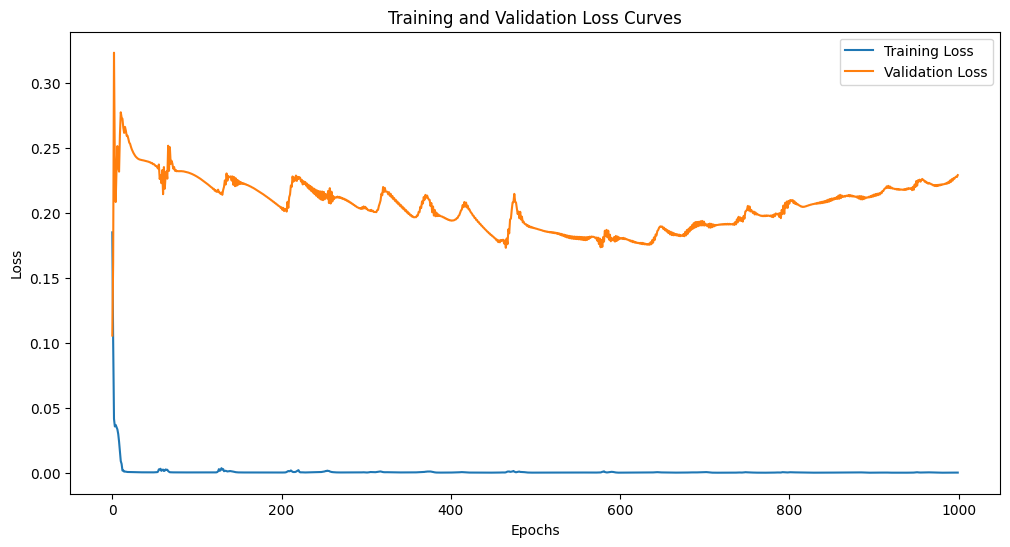


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss') 
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# Plotting code

/var/folders/3w/f7q51tgx1zb66cllgwgqhp640000gn/T/ipykernel_34497/2969243977.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['pt'] = pd.to_datetime(filtered['pt'], errors='coerce')


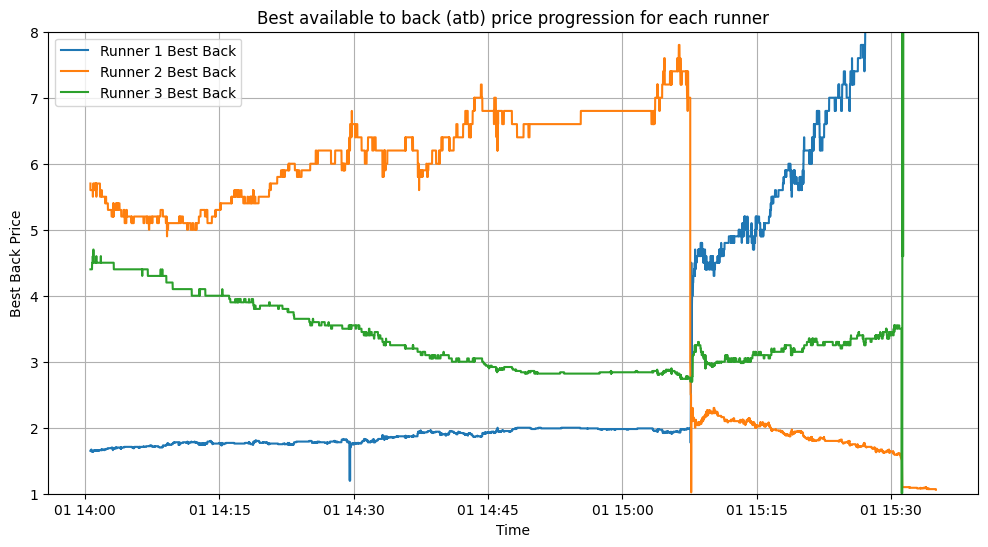

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Filter rows where 'inPlay' is True
filtered = df[df['inPlay'] == True]

# Convert the 'pt' column to datetime, coercing errors to NaT
filtered['pt'] = pd.to_datetime(filtered['pt'], errors='coerce')

# Define the date and time range
start_time = pd.to_datetime('2023-01-01 14:00')
end_time = pd.to_datetime('2023-01-01 15:35')

# Filter the DataFrame for the specified time range
filtered = filtered[(filtered['pt'] >= start_time) & (filtered['pt'] <= end_time)]

# Plotting the best back prices for Runner 2 over time
plt.figure(figsize=(12, 6))

plt.plot(filtered['pt'], filtered['runner1_best_back'], label='Runner 1 Best Back')
plt.plot(filtered['pt'], filtered['runner2_best_back'], label='Runner 2 Best Back')
plt.plot(filtered['pt'], filtered['runner3_best_back'], label='Runner 3 Best Back')
# Adding titles and labels
plt.title('Best available to back (atb) price progression for each runner')
plt.xlabel('Time')
plt.ylabel('Best Back Price')
plt.ylim(1, 8)  # Set the y-axis limits from 1 to 8
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


